# Métodos multipaso. Estabilidad.
#### https://meet.noysi.com/metodosnumericos2

## Métodos de Adams-Bashforth y Adams-Moulton

Comencemos calculando los coeficientes de los métodos de Adam-Bashford.

In [1]:
@cached_function
def beta_Adams_Bashforth(k,j):
    # Coeficiente j del método de Adams-Bashforth de k-pasos.
    lj(t)=prod([(t-i)/(j-i) for i in [0..j-1]+[j+1..k-1]])    
    return lj.integral(t,k-1,k)

### Ejercicios

1. Aplicar el método de Adams-Bashforth de 3 pasos al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0,$$ para aproximar el valor en $t=4$ con 40 pasos. Utilizar algún método de tercer orden para calcular las aproximaciones iniciales.  
2. Aplicar el método predictor-corrector, usando Adams-Bashforth de 3 pasos como predictor y el método de Adams-Moulton de dos pasos como corrector, al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0,$$ para aproximar el valor en $t=4$ con 40 pasos. Utilizar algún método de tercer orden para calcular las aproximaciones iniciales.  
3. Estimar los errores en cada paso en la aplicación del método anterior.

In [17]:
# x' = x, x(0) = 1
# x(t) = exp(t)
f(t,x) = x
h = 0.1 
n = 10
k = 3
a = 0.
b = 1.
x0 = 1.

In [3]:
beta_Adams_Bashforth(3,0),beta_Adams_Bashforth(3,1),beta_Adams_Bashforth(3,2)

(5/12, -4/3, 23/12)

In [4]:
t0 = 0
t1 = h
t2 = 2*h

In [5]:
x1 = exp(h)
x2 = exp(2*h)

In [6]:
t3 = 3*h
x3 = x2 + h*( beta_Adams_Bashforth(3,0)*f(t0,x0) +
              beta_Adams_Bashforth(3,1)*f(t1,x1) +
              beta_Adams_Bashforth(3,2)*f(t2,x2) )
t3,x3

(0.300000000000000, 1.34981549773078)

In [7]:
t4 = 4*h
x4 = x3 + h*( beta_Adams_Bashforth(3,0)*f(t1,x1) +
              beta_Adams_Bashforth(3,1)*f(t2,x2) +
              beta_Adams_Bashforth(3,2)*f(t3,x3) )
t4,x4

(0.400000000000000, 1.49172522196098)

In [16]:
xi = [x0,x1,x2]
xi

[1.00000000000000, 1.10517091807565, 1.22140275816017]

In [23]:
# versión eficiente
def AB(f,a,b,xi,m,k):
    # Definimos h
    h = (b-a)/m
    bAB = [ beta_Adams_Bashforth(k,j) for j in [0 ..k-1] ]
    # Creamos las listas iniciales donde guardaremos los valores
    tk = [a, a+h .. b]
    xk = xi + [x0]*(m-k+1)
    fk = [f(tk[i],xk[i]) for i in [0 .. k-1]] + [x0]*(m-k+1)
    for n in [0 .. m-k]:
        # Calculamos el sumatorio
        sumatorio = sum([ bAB[j]*fk[n+j]
                         for j in [0 .. k-1] ])
        # aplicamos la fórmula
        xk[n+k] = xk[n+k-1] + h*sumatorio
        fk[n+k] = f(tk[n+k],xk[n+k])
    return list(zip(tk,xk))

In [24]:
def AB(f,a,b,xi,m,k):
    # Definimos h
    h = (b-a)/m
    # Creamos las listas iniciales donde guardaremos los valores
    tk = [a, a+h .. b]
    xk = xi + [x0]*(m-k+1)
    for n in [0 .. m-k]:
        # Calculamos el sumatorio
        sumatorio = sum([ beta_Adams_Bashforth(k,j)*f(tk[n+j],xk[n+j])
                         for j in [0 .. k-1] ])
        # aplicamos la fórmula
        xk[n+k] = xk[n+k-1] + h*sumatorio
    return list(zip(tk,xk))

In [25]:
AB(f,a,b,xi,10,3)

[(0.000000000000000, 1.00000000000000),
 (0.100000000000000, 1.10517091807565),
 (0.200000000000000, 1.22140275816017),
 (0.300000000000000, 1.34981549773078),
 (0.400000000000000, 1.49172522196098),
 (0.500000000000000, 1.64855560472940),
 (0.600000000000000, 1.82187437844652),
 (0.700000000000000, 2.01341477126656),
 (0.800000000000000, 2.22509250216351),
 (0.900000000000000, 2.45902469467791),
 (1.00000000000000, 2.71755104300548)]

1. Aplicar el método de Adams-Bashforth de 3 pasos al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0,$$ para aproximar el valor en $t=4$ con 40 pasos. Utilizar algún método de tercer orden para calcular las aproximaciones iniciales.  

In [26]:
f(t,x) = t*(1-x^2)
a = 0.
b = 4.
x0 = 0.
n = 40
k = 3

In [29]:
def derivada_total_ecuacion(f,k):
    """
    Calcula la derivada total k-ésima de la solución de la ecuación diferencial 
    x' = f(t, x).
    
    Args:
    f: Función que define la ecuación diferencial (f(t, x)).
    x: La variable dependiente (en este caso, x).
    t: La variable independiente (en este caso, t).
    k: El orden de la derivada que se desea calcular.
    
    Returns:
    La derivada total k-ésima de x(t).
    """
    # Iniciamos con la derivada de primer orden
    derivada = f(t, x)
    
    # Calculamos la derivada total k-ésima de manera sucesiva
    for i in range(k):
        # Derivamos respecto de t, aplicando la regla de la cadena
        derivada = derivada.diff(t) + derivada.diff(x) * f(t, x)
    
    return derivada.expand()

def phi_taylor(f,h,k):
    return sum([ derivada_total_ecuacion(f,i)*h^i/factorial(i+1) 
                     for i in [0 .. k-1 ]])

def taylor(f,a,b,x0,n,k):
    h = (b-a)/n
    ti = [a.n(), a+h .. b]
    xi = [x0]*(n+1)
    T(t,x) = phi_taylor(f,h,k)
    for i in [ 1..n ]:
        xi[i] = xi[i-1] + h * T( ti[i-1] , xi[i-1] ) 
    return list(zip(ti,xi))

In [33]:
xi = [ xk for tk,xk in taylor(f,a,0.2,x0,2,k) ]
xi

[0.000000000000000, 0.00500000000000000, 0.0199982917249994]

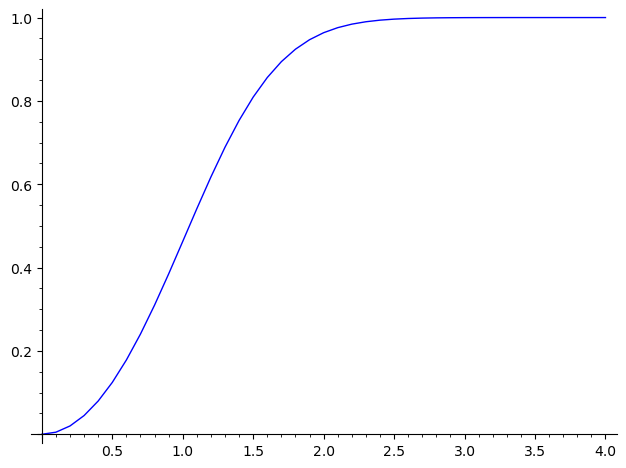

In [35]:
line(AB(f,a,b,xi,n,k))

2. Aplicar el método predictor-corrector, usando Adams-Bashforth de 3 pasos como predictor y el método de Adams-Moulton de dos pasos como corrector, al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0,$$ para aproximar el valor en $t=4$ con 40 pasos. Utilizar algún método de tercer orden para calcular las aproximaciones iniciales.  

In [39]:
@cached_function
def beta_Adams_Moulton(k,j):
    # Coeficiente j del método de Adams-Bashforth de k-pasos.
    lj(t)=prod([(t-i)/(j-i) for i in [0..j-1]+[j+1..k]])    
    return lj.integral(t,k-1,k)

In [40]:
[ beta_Adams_Moulton(2,j) for j in [0 .. 2] ]

[-1/12, 2/3, 5/12]

In [67]:
def PCA3(f,a,b,xi,m):
    # Definimos h
    h = (b-a)/m
    # Creamos las listas iniciales donde guardaremos los valores
    tk = [a, a+h .. b]
    xk = xi + [x0]*(m-2)
    for n in [0 .. m-3]:
        # Adams-Basforth
        xk[n+3] = xk[n+2] + h*(23*f(tk[n+2],xk[n+2]) 
                              -16*f(tk[n+1],xk[n+1])  
                              +5*f(tk[n],xk[n]))/12
        xktilde = copy(xk[n+3])
        # Adams-Moulton
        xk[n+3] = xk[n+2] + h*(5*f(tk[n+3],xk[n+3]) 
                              +8*f(tk[n+2],xk[n+2])  
                                -f(tk[n+1],xk[n+1]))/12
        if (xktilde-xk[n+3]).abs()/10>10^-5:
            print('El paso es demasiado grande')
    return list(zip(tk,xk))

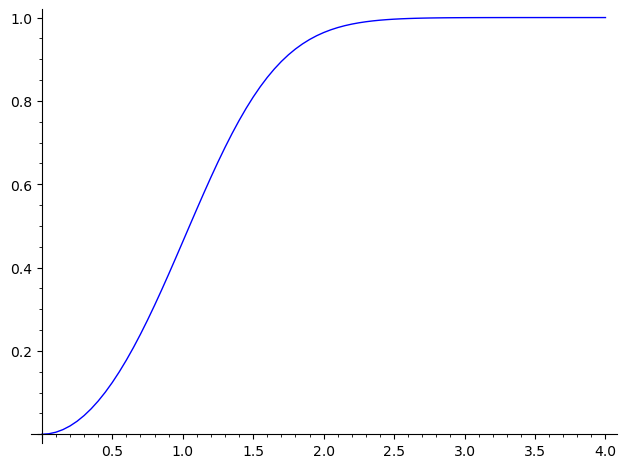

In [70]:
n = 80
h = (b-a)/n
xi = [ xk for tk,xk in taylor(f,a,a+2*h,x0,2,k) ]
line(PCA3(f,a,b,xi,n))

In [52]:
def PC(f,a,b,xi,m,k):
    # Definimos h
    h = (b-a)/m
    # Creamos las listas iniciales donde guardaremos los valores
    tk = [a, a+h .. b]
    xk = xi + [x0]*(m-k+1)
    for n in [0 .. m-k]:
        # AB
        sumatorio = sum([ beta_Adams_Bashforth(k,j)*f(tk[n+j],xk[n+j])
                         for j in [0 .. k-1] ])
        xk[n+k] = xk[n+k-1] + h*sumatorio
        # AM
        sumatorio = sum([ beta_Adams_Moulton(k-1,j-1)*f(tk[n+j],xk[n+j])
                         for j in [1 .. k] ])
        xk[n+k] = xk[n+k-1] + h*sumatorio
    return list(zip(tk,xk))

## Estabilidad absoluta de los métodos de un paso

Consideremos el método de Taylor. Recordemos que el método es absolutamente estable para un valor $\bar h$ si al sustituir en la ecuación test, se obtiene que la sucesión $x_n$ definida por el método es convergente. Es fácil comprobar que en el método de Taylor la sucesión que define el método para es de la forma $x_{n+1}=x_n P(\bar h)$, donde
$$
P(x)=1+x+\frac{x^2}{2!}+\ldots+\frac{x^p}{p!}.
$$
Luego el método será estable siempre que $|P(\bar h)|<1$.

In [72]:
# Estabilidad del método de Taylor
var('x,y,H')
def P(n,H):
    # Caculamos el polinomio P
    return 1+sum([H^k/factorial(k) for k in [1..n]])
def ET(x,y,n):
    # Calculamos el módulo de P(h) 
    cc = P(n,x+I*y).expand().coefficients(I)
    return cc[0][0]^2+cc[1][0]^2

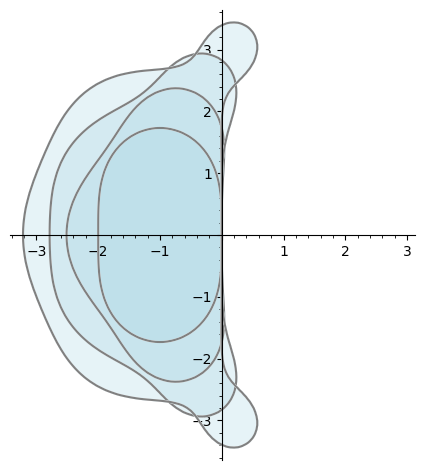

In [73]:
# Regiones de estabilidad absoluta para el método de Taylor de órden 2,3,4,5
R2=region_plot( ET(x,y,2)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R3=region_plot( ET(x,y,3)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R4=region_plot( ET(x,y,4)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R5=region_plot( ET(x,y,5)<1,(x,-3.3,3),(y,-3.5,3.5), incol='lightblue', bordercol='gray',alpha=0.3) 
R2+R3+R4+R5

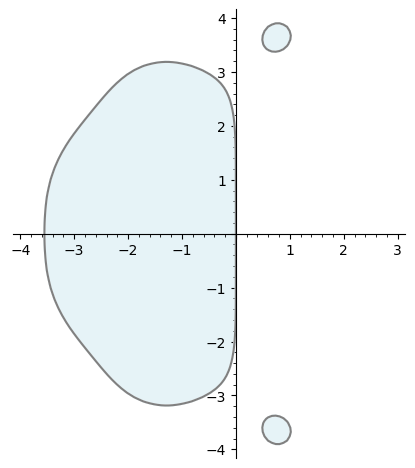

In [74]:
R6=region_plot( ET(x,y,6)<1,(x,-4,3),(y,-4,4), incol='lightblue', bordercol='gray',alpha=0.3) 

R6

1. Aplicar el método de Taylor al PVI
$$x'=ax+by,\quad y'=-bx+ay,\quad x(0)=1,\quad y(0)=0,$$
eligiendo los coeficientes $a,b$ de modo que:

  a) La solución del problema de valor inicial sea convergente al $(0,0)$ y el método de Taylor de quinto orden también.

  b) La solución del problema de valor inicial sea convergente al $(0,0)$ y el método de Taylor de quinto orden no.

  c) La solución del problema de valor inicial no sea convergente $(0,0)$ y el método de Taylor de quinto orden tampoco.

  d) La solución del problema de valor inicial no sea convergente al $(0,0)$ y el método de Taylor de quinto orden sí.

In [76]:
def derivada_total(f,k):
    
    derivada = copy(f)
    
    for i in range(k):
        derivada = derivada.diff() * f
        
    return derivada
def phi_taylor(f,h,k):
    
    return sum([ derivada_total(f,i)*h^i/factorial(i+1) 
                     for i in [0 .. k-1 ]])
def taylor(f,x0,h,n,k):
    
    xi = [vector(RDF,x0)]*(n+1)
    
    T = phi_taylor(f,h,k)
    
    for i in [ 1 .. n ]:
        xi[i] = xi[i-1] + h * T( *xi[i-1] ) 
    
    return xi

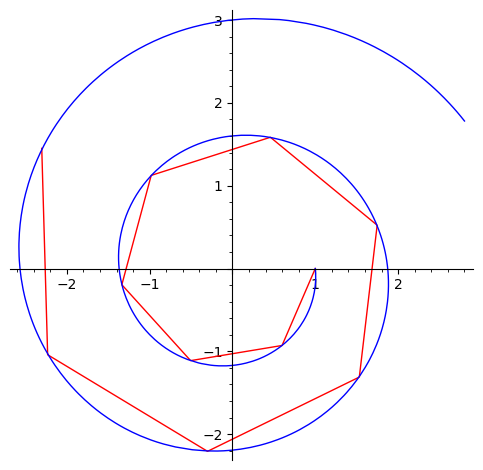

In [85]:
a = 0.2
b = 2
F(x,y) = [ a*x+b*y ,-b*x + a*y ]
x0 = vector(RDF,[1.,0])
h = .5
line(taylor(F,x0,h,10,5),color='red') + \
parametric_plot([exp(a*t)*cos(-b*t),exp(a*t)*sin(-b*t)],(t,0,6))

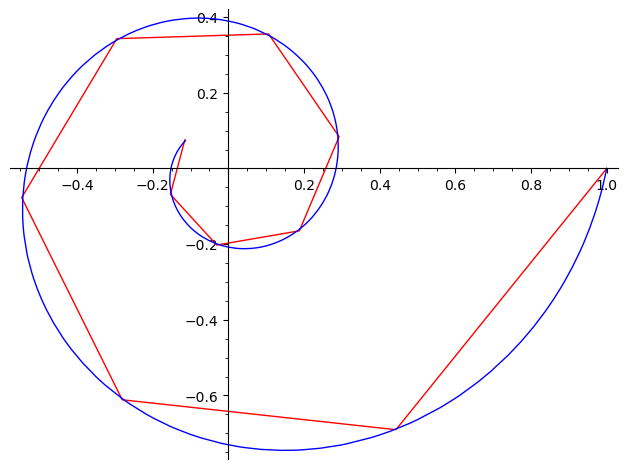

## Estabilidad del los métodos multipaso

Consideremos ahora los métodos de Adams_Bashforth. Su polinomio característico es:

In [ ]:
def p(x,h,k):
    return x^k-x^(k-1)-h*sum([beta_Adams_Bashforth(k,i)*x^i for i in [0 .. k-1]])

Particularicemos para el método de dos pasos. En primer lugar calculamos las raíces del método.

In [ ]:
# Tenemos que ordenar las raíces para que la primera sea la correspondiente a 1 cuando h=0.
var('x,h')
r2(h)=p(x,h,2).roots(x)[0][0]
r1(h)=p(x,h,2).roots(x)[1][0]

In [ ]:
# Comprobamos
r1(0),r2(0)

### Estabilidad relativa

El método será relativamente estable cuando la norma de la primera raíz sea mayor que la del resto de raíces. En este caso,

In [ ]:
region_plot(lambda x,y:r2(x+I*y).norm()<r1(x+I*y).norm(), (x,-1,1),(y,-1,1), plot_points=150, alpha=0.5)

### Estabilidad absoluta

El método será absolutamente estable cuando todas las raíces tengan módulo menor que 1.

In [ ]:
var('x,y')
region_plot(lambda x,y:r1(x+I*y).norm()<1, (x,-1,1),(y,-1,1),alpha=0.3, plot_points=150) + region_plot(lambda x,y:r2(x+I*y).norm()<1, (x,-1,1),(y,-1,1),alpha=0.3, plot_points=150)

### Ejercicios

1. Calcular la estabilidad de los dos primeros métodos multipaso que aparecen en la presentación de clase.
2. Probar dichos métodos, el método de tres etapas de orden máximo y el método de Adams-Bashforth con $k=3$ para el problema test $x'=\lambda x$, $x(0)=1$. Elegir los valores adecuados de $\lambda$ y de las condiciones iniciales para obtener comportamientos anómalos de los métodos. 

## Sistemas de ecuaciones

### Ejercicios
1. Aplicar el método predictor-corrector usando Adams-Bashforth de 3 pasos como predictor y el método de Adams-Moulton de dos pasos como corrector, a la ecuación del péndulo 
$$x' = -\sin(x),\quad x(0)=1,\ x'(0)=1,$$ para aproximar el valor en $t=8$. Utilizar algún método de tercer orden para calcular las aproximaciones iniciales. Elegir el paso para que la estimación del error que proporciona el método sea menor que $10^-3$.  